In [1]:
# For interactive plots, comment the next line
%pylab inline

# For interactive plots, uncomment the next line
# %pylab ipympl

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load array data (numerical list, numpy array) data collected into a PODPAC node.

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file.*</small>

## Setup

Make sure you have PODPAC installed:

```
$ pip install podpac
```


## Array Data

In [2]:
from podpac.data import Array
from podpac import Coordinates
import numpy as np

# mock data
data = np.random.rand(5, 5)
data

array([[0.44350636, 0.69119129, 0.7242576 , 0.3148419 , 0.73932978],
       [0.80816447, 0.3964196 , 0.18230299, 0.23390778, 0.73337435],
       [0.43419515, 0.60961382, 0.34147399, 0.58374822, 0.11680655],
       [0.22437357, 0.45099669, 0.31923717, 0.01580003, 0.53492713],
       [0.44629212, 0.94377183, 0.24811276, 0.06972643, 0.40936774]])

In [3]:
# create native coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']

In [4]:
# create Array DataSource node
node = Array(source=data, native_coordinates=native_coords)
node

Array DataSource
	source: 
[[0.44350636 0.69119129 0.7242576  0.3148419  0.73932978]
 [0.80816447 0.3964196  0.18230299 0.23390778 0.73337435]
 [0.43419515 0.60961382 0.34147399 0.58374822 0.11680655]
 [0.22437357 0.45099669 0.31923717 0.01580003 0.53492713]
 [0.44629212 0.94377183 0.24811276 0.06972643 0.40936774]]
	native_coordinates: 
		lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
		lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	interpolation: nearest

In [5]:
# evaluate this note at its native coordinates
output = node.eval(node.native_coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.443506, 0.691191, 0.724258, 0.314842, 0.73933 ],
       [0.808164, 0.39642 , 0.182303, 0.233908, 0.733374],
       [0.434195, 0.609614, 0.341474, 0.583748, 0.116807],
       [0.224374, 0.450997, 0.319237, 0.0158  , 0.534927],
       [0.446292, 0.943772, 0.248113, 0.069726, 0.409368]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x10731ec50>
    crs:          EPSG:4326

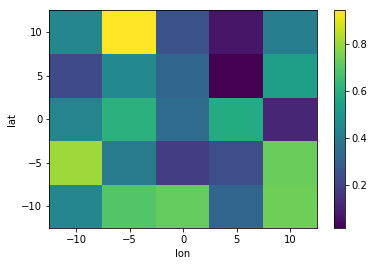

In [6]:
output.plot()
pass

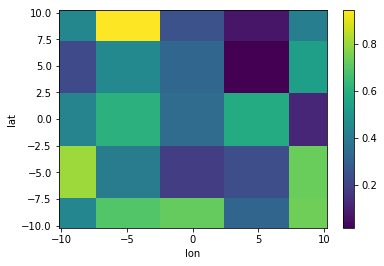

In [7]:
# scale down data
# default interpolation is nearest neighbor
coords = Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

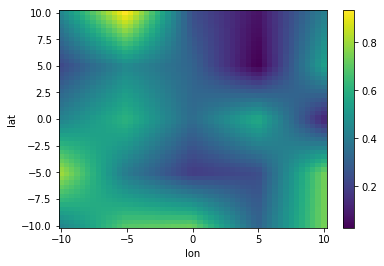

In [8]:
# scale down and use bilinear interpolation
node.interpolation = 'bilinear'
output = node.eval(coords)
output.plot()
pass